In [1]:
from __future__ import absolute_import, division, print_function
import matplotlib.pyplot as plt
import os
import numpy as np

import tensorflow as tf
from tensorflow import keras


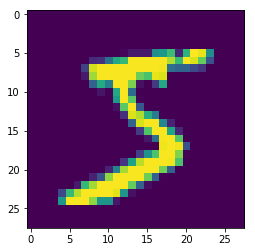

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images[0]
%matplotlib inline
plt.imshow(train_images[0])

In [3]:
train_images = train_images[:1000].reshape(-1,28*28) / 255.0
test_images = test_images[:1000].reshape(-1,28*28) / 255.0

test_images[0].shape

(784,)

In [4]:
def create_model():
    model = tf.keras.models.Sequential([
        keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                 loss=tf.keras.losses.sparse_categorical_crossentropy,
                 metrics=['accuracy'])
    
    return model

model = create_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                save_weights_only=True,
                                                verbose=1)

model = create_model()
model.fit(train_images, train_labels, epochs = 10,
         validation_data = (test_images, test_labels),
         callbacks=[cp_callback])


Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 1s 1ms/step - loss: 1.1901 - acc: 0.6370 - val_loss: 0.7464 - val_acc: 0.7710

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
1000/1000 [==============================] - 1s 702us/step - loss: 0.4281 - acc: 0.8820 - val_loss: 0.5564 - val_acc: 0.8220

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
1000/1000 [==============================] - 1s 764us/step - loss: 0.2999 - acc: 0.9250 - val_loss: 0.4607 - val_acc: 0.8570

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
1000/1000 [==============================] - 1s 780us/step - loss: 0.2164 - acc: 0.9490 - val_loss: 0.4415 - val_acc: 0.8610

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
1000/1000 [==============================] - 1s 785us/step - loss: 0.1617 - acc: 0.9640 - val_loss: 0.4391 - val_acc: 0.8560

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
1000/1000 [=======

In [6]:
model = create_model()

loss, acc = model.evaluate(test_images, test_labels)
print('Untrained model, accuracy: {:5.2f}%'.format(100*acc))

1000/1000 [==============================] - 0s 208us/step
Untrained model, accuracy:  5.60%


In [7]:
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))


1000/1000 [==============================] - 0s 90us/step
Restored model, accuracy: 87.50%


In [8]:
checkpoint_path = "training_2/cp-{epoch:05d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
checkpoint_path, verbose=1, save_weights_only=True,
period=5)

model = create_model()
model.fit(train_images, train_labels,
         epochs=50, callbacks=[cp_callback],
         validation_data = (test_images, test_labels),
          verbose=0)




Epoch 00005: saving model to training_2/cp-00005.ckpt

Epoch 00010: saving model to training_2/cp-00010.ckpt

Epoch 00015: saving model to training_2/cp-00015.ckpt

Epoch 00020: saving model to training_2/cp-00020.ckpt

Epoch 00025: saving model to training_2/cp-00025.ckpt

Epoch 00030: saving model to training_2/cp-00030.ckpt

Epoch 00035: saving model to training_2/cp-00035.ckpt

Epoch 00040: saving model to training_2/cp-00040.ckpt

Epoch 00045: saving model to training_2/cp-00045.ckpt

Epoch 00050: saving model to training_2/cp-00050.ckpt


In [9]:
import pathlib

checkpoints = pathlib.Path(checkpoint_dir).glob("*.index")
checkpoints = sorted(checkpoints, key=lambda cp:cp.stat().st_mtime)
checkpoints = [cp.with_suffix('') for cp in checkpoints]
latest = str(checkpoints[-1])
checkpoints

[WindowsPath('training_2/cp-00030.ckpt'),
 WindowsPath('training_2/cp-00035.ckpt'),
 WindowsPath('training_2/cp-00040.ckpt'),
 WindowsPath('training_2/cp-00045.ckpt'),
 WindowsPath('training_2/cp-00050.ckpt')]

In [10]:
model = create_model()
model.load_weights(latest)
loss, acc = model.evaluate(test_images, test_labels)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

1000/1000 [==============================] - 0s 378us/step
Restored model, accuracy: 87.50%
